# EDA for NCAA March Madness

In [31]:
import os
import glob
import pandas as pd
import re
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

In [2]:
files = glob.glob('input/MEvents*.csv')

In [3]:
# 'MEvents'로 시작하는 모든 CSV file을 불러오기
data_frames = [pd.read_csv(file) for file in files]

events = pd.concat(data_frames, axis=0, sort=False)
events.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0


In [4]:
# 디버깅: True일땐 MEvents 별로 50000개의 행만 랜덤하게 불러옴, False일땐 전체 행을 불러옴
# Reference: https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame

DEBUG = True
if DEBUG:
    sample_size = 50000
else: 
    smaple_size = None

def get_skiprows(file, sample_size):
    num_of_records = sum(1 for line in open(file))
    # the 0-indexed header will not be included in the skip list
    skiprows = sorted(random.sample(range(1,num_of_records+1),
                                num_of_records-sample_size))
    return skiprows

In [5]:
PATH = 'input/'
dfs = {'MEvents': [], 'Misc': {}}
for root, dirs, files in os.walk(PATH):
    for file in files:
        path_and_file = os.path.join(root, file)
        print(path_and_file)
        if bool(re.search('MEvents', path_and_file)):
            skiprows = get_skiprows(path_and_file, sample_size)
            dfs['MEvents'].append(pd.read_csv(path_and_file, skiprows=skiprows))
            
        elif bool(re.search('.DS_Store', path_and_file)):
            pass
        else:
            file_name_start_index = path_and_file.rfind('/') + 1
            file_name_end_index = re.search('.csv', path_and_file).span()[0]
            if bool(re.search('MTeamSpellings', path_and_file)):
                dfs['Misc'][path_and_file[file_name_start_index:file_name_end_index]] = pd.read_csv(path_and_file, encoding='cp1252')
            else: 
                dfs['Misc'][path_and_file[file_name_start_index:file_name_end_index]] = pd.read_csv(path_and_file)                
            

input/MEvents2015.csv
input/MEvents2016.csv
input/MEvents2017.csv
input/MEvents2018.csv
input/MEvents2019.csv
input/MPlayers.csv
input/MSampleSubmissionStage1_2020.csv
input/MDataFiles_Stage1\Cities.csv
input/MDataFiles_Stage1\Conferences.csv
input/MDataFiles_Stage1\MConferenceTourneyGames.csv
input/MDataFiles_Stage1\MGameCities.csv
input/MDataFiles_Stage1\MMasseyOrdinals.csv
input/MDataFiles_Stage1\MNCAATourneyCompactResults.csv
input/MDataFiles_Stage1\MNCAATourneyDetailedResults.csv
input/MDataFiles_Stage1\MNCAATourneySeedRoundSlots.csv
input/MDataFiles_Stage1\MNCAATourneySeeds.csv
input/MDataFiles_Stage1\MNCAATourneySlots.csv
input/MDataFiles_Stage1\MRegularSeasonCompactResults.csv
input/MDataFiles_Stage1\MRegularSeasonDetailedResults.csv
input/MDataFiles_Stage1\MSeasons.csv
input/MDataFiles_Stage1\MSecondaryTourneyCompactResults.csv
input/MDataFiles_Stage1\MSecondaryTourneyTeams.csv
input/MDataFiles_Stage1\MTeamCoaches.csv
input/MDataFiles_Stage1\MTeamConferences.csv
input/MDataFil

In [6]:
# Concatenate MEvents2015, 2016, 2017, 2018, 2019 together
events = pd.concat(dfs['MEvents'], axis=0, sort=False)
events.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,24,2015,11,1103,1420,74,57,0,0,239,1420,11803,made2,lay,0,0,0
1,51,2015,11,1103,1420,74,57,0,0,408,1420,11793,steal,NaN,0,0,0
2,98,2015,11,1103,1420,74,57,0,0,632,1420,11778,sub,in,0,0,0
3,150,2015,11,1103,1420,74,57,0,0,835,1103,112,made2,lay,0,0,0
4,180,2015,11,1103,1420,74,57,0,0,1010,1103,112,sub,out,0,0,0


In [7]:
# Merge events and MPlayers
events = events.merge(dfs['Misc']['MPlayers'],
             how='left',
             left_on = ['EventTeamID', 'EventPlayerID'],
             right_on = ['TeamID', 'PlayerID'])

In [8]:
events.drop(['PlayerID', 'TeamID'], axis=1, inplace=True)

In [9]:
events.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area,LastName,FirstName
0,24,2015,11,1103,1420,74,57,0,0,239,1420,11803,made2,lay,0,0,0,Sparow,Wayne
1,51,2015,11,1103,1420,74,57,0,0,408,1420,11793,steal,NaN,0,0,0,Morgan,Aaron
2,98,2015,11,1103,1420,74,57,0,0,632,1420,11778,sub,in,0,0,0,Elliott,Rodney
3,150,2015,11,1103,1420,74,57,0,0,835,1103,112,made2,lay,0,0,0,Treadwell,Demetrius
4,180,2015,11,1103,1420,74,57,0,0,1010,1103,112,sub,out,0,0,0,Treadwell,Demetrius


`LastName`과 `FirstName`이 잘 결합되었씁니다.

In [10]:
events.shape

(250000, 19)

## Very Simple Feature Engineering

#### 성과 이름을 결합하여 전체 이름 피처 생성

In [11]:
events['FullName'] = events['FirstName'] + ' ' + events['LastName']

#### 경과시간을 통하여 `Quarter` 피처 생성

In [12]:
# Max ElapsedSeconds
events.ElapsedSeconds.max()

3593

가장 긴 경기 시간은 3600초입니다. 2400초까지가 두번째 하프타임 시간입니다. 연장경기 한번에 300초이므로 3600까지면 총 4번의 연장경기를 한 것입니다.

In [14]:
quarter_bins = [0, 1200, 2400, 2700, 3000, 3300, 3600]
quarter_labels = ['1st', '2nd', 'over1', 'over2', 'over3', 'over4']
events['Quarter'] = pd.cut(events['ElapsedSeconds'], 
                           bins=quarter_bins, labels=quarter_labels)

- 1st: 첫번째 하프
- 2nd: 두번째 하프
- over1: 첫 번째 오버타임
- over2: 두 번째 오버타임
- over3: 세 번째 오버타임
- over4: 네 번째 오버타임

#### 연장시간 여부에 대한 피처 생성
- 1이면 연장시간. 0이면 정규 경기시간

In [15]:
overtime_bins = [0, 2400, 3600]
overtime_labels = [0, 1]
events['Overtime'] = pd.cut(events['ElapsedSeconds'], 
                           bins=overtime_bins, labels=overtime_labels)

In [16]:
events.head(10)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,...,EventType,EventSubType,X,Y,Area,LastName,FirstName,FullName,Quarter,Overtime
0,24,2015,11,1103,1420,74,57,0,0,239,...,made2,lay,0,0,0,Sparow,Wayne,Wayne Sparow,1st,0
1,51,2015,11,1103,1420,74,57,0,0,408,...,steal,NaN,0,0,0,Morgan,Aaron,Aaron Morgan,1st,0
2,98,2015,11,1103,1420,74,57,0,0,632,...,sub,in,0,0,0,Elliott,Rodney,Rodney Elliott,1st,0
3,150,2015,11,1103,1420,74,57,0,0,835,...,made2,lay,0,0,0,Treadwell,Demetrius,Demetrius Treadwell,1st,0
4,180,2015,11,1103,1420,74,57,0,0,1010,...,sub,out,0,0,0,Treadwell,Demetrius,Demetrius Treadwell,1st,0
5,210,2015,11,1103,1420,74,57,0,0,1151,...,block,NaN,0,0,0,McAdams,Reggie,Reggie McAdams,1st,0
6,297,2015,11,1103,1420,74,57,0,0,1661,...,miss1,unk,0,0,0,Treadwell,Demetrius,Demetrius Treadwell,2nd,0
7,304,2015,11,1103,1420,74,57,0,0,1676,...,foul,unk,0,0,0,Forsythe,Pat,Pat Forsythe,2nd,0
8,383,2015,11,1103,1420,74,57,0,0,1928,...,turnover,unk,0,0,0,Robotham,Noah,Noah Robotham,2nd,0
9,397,2015,11,1103,1420,74,57,0,0,2016,...,reb,def,0,0,0,Houston,Devarick,Devarick Houston,2nd,0


## EDA

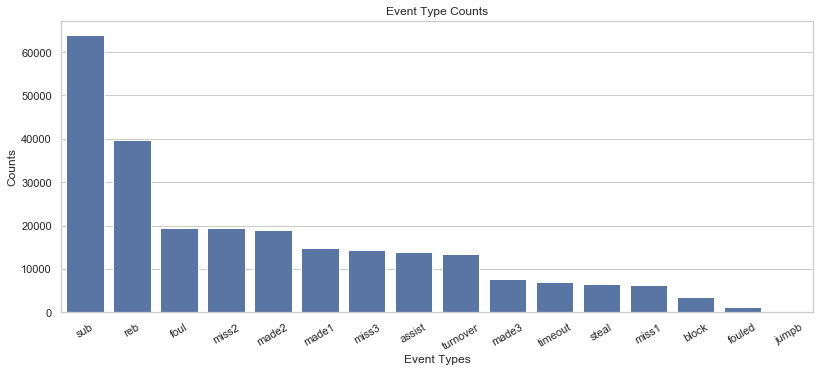

In [55]:
event_type = events['EventType'].value_counts()
plt.figure(figsize=(12, 5))
base_color = sns.color_palette()[0]

sns.barplot(x=event_type.index, y=event_type.values, color=base_color)
plt.title('Event Type Counts'); plt.xlabel('Event Types'); plt.ylabel('Counts')
plt.xticks(rotation=30);